In [1]:
# Paul-Jason Mello
# Professor Shim
# CMPE 257
# March 10th, 2022

# Neural Networks

In [2]:
import keras 
import numpy as np

from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

## 1. What are Neurons?

In [3]:
# Neurons are a feature of our brains which allow us to learn and adapt. They are very small components 
# of a specialized connection we call synapses. A neuron is made up of many intricate parts which each play
# an important role in the delivery of electrical signals through out the brain. The most important aspect of 
# the neuron consists of its is capability of working in a chain like function with other neurons. An 
# electrical pulse is recieved by the dendrites and based on the neurons threshold it may or may not send the 
# signal through the axon. Assuming it does send the signal, it may send the signal to other neurons or a 
# synaptic terminal. With large networks of neurons working we find that learning can be achieved through
# this process. Additionally, neurons will degrade if they are not used and be reinforced if they are used
# often.

## 2. Explain the architecture of a neural network

In [4]:
# The architecture of a neural network is in essence a copy of a neuron chain we find in our brain. We find
# that using a neuron we can induce learning. By chaining these neurons we can create more complex learning 
# patterns. A neural network consists of some N number of layers which contain some K number of neurons in 
# each layer. These N layers can vary from architecture to architecture but the K number of neurons can vary
# from layer to layer. For example we may have a 3 layer ANN with 4 neurons in the first layer followed by
# 3, 4, and 2 neurons in each subsequent layer. Each of these neurons can have activation functions which
# determine if their signal will continue to propogate to the next layer. Additionally, each neruon will have 
# a weight to determine its importance in determining the output. This system will adjust these weights 
# through backpropagation or other means as a way to better map the input to its appropriate output. 

## 3. How many parameters are there in a neural network with 4 hidden layers having 30,25,20,15 neurons each and the input and output layer having 50 and 1 neuron respectively

In [5]:
# Our nneural network looks like the following network:

# Layer 0   Layer 1    Layer 2    Layer 3    Layer 4    Layer 5
#   50  --->  30  --->   25  --->   20   --->  15  --->   1

# Number of Parameters:
#   3,156 total

In [6]:
def buildModelParams():
    model = Sequential()
    model.add(Dense(30, input_dim = 50, activation = 'relu'))
    model.add(Dense(25, activation = 'relu'))
    model.add(Dense(20, activation = 'relu'))
    model.add(Dense(15, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) #Change for binary classification (entropy)
    return model

In [7]:
modelParam = buildModelParams()
print(modelParam.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                1530      
_________________________________________________________________
dense_1 (Dense)              (None, 25)                775       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_3 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 16        
Total params: 3,156
Trainable params: 3,156
Non-trainable params: 0
_________________________________________________________________
None


## 4. Explain gradient descent

In [8]:
# Gradient descent is a method used for finding the global minimum in a function. In essence we are attempting
# to fall into the global minimum by consistantly adjusting the direction and weight associated with each step.
# The idea is that as we continue to approach the bottom, the steepness will gradually decrease until there is
# a point where the steepness is zero or almost zero. We can calcualte this by using the derivative of the
# function at any given point to determine the steepness. There is a looming problem that we may end up in 
# a local minimum and not the global minimum, meaning we get trapped in a "well" where the steepness on either
# side is too great to overcome, but it is not the global minimum. Gradient descent is used in many algorithms
# and it has been continually improved over many generations.

## 5. What is categorical cross entropy

In [9]:
# Categorical cross entropy is a loss function which is capable of mapping inputs to a multi-class output.
# Using a softmax function we can describe the probability distribution for each class. Once determined
# we can map these probabilities to our target features output. This is best used when there are many labelled
# classes.

## 6. Explain in short the following terms: Relu, Sigmoid, softmax

In [10]:
# ReLU
# ReLU is a linear activation function that is known to be fast computation wise and simple to implement.
# It converges faster and is maps inputs between max(0,X)

# Sigmoid
# Sigmoid is a logistic function characterized by an elonged S curve. It was very common before neural
# networks took off due to its ability to map inputs. Probelmatically, as we take the derivatives of the
# function we find that the vanishing gradient problem is apparent. It maps inputs using this equation:
# 1/(1 + (e^-x))

# Softmax
# Softmax is a function which is similar in principle to the sigmoid function, but rather than mapping inputs
# between 0 and 1 it maps inputs to a probability distribution. These outputs sum to 1 as they represent
# the likeliness of each output.

## 7. Load the mnist dataset

In [11]:
mnistData = mnist.load_data()

In [12]:
(X_train, Y_train), (X_test, Y_test) = mnistData

In [13]:
print("X_train MNIST data:" + str(X_train.shape))
print("Y_train MNIST data:" + str(Y_train.shape))
print("X_test MNIST data:" + str(X_test.shape))
print("Y_test MNIST data:" + str(Y_test.shape))

X_train MNIST data:(60000, 28, 28)
Y_train MNIST data:(60000,)
X_test MNIST data:(10000, 28, 28)
Y_test MNIST data:(10000,)


## 8. plot some sample images

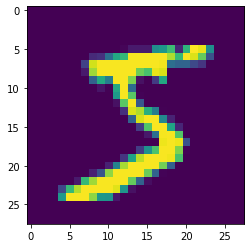

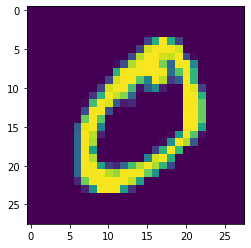

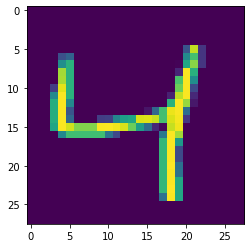

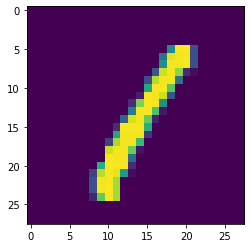

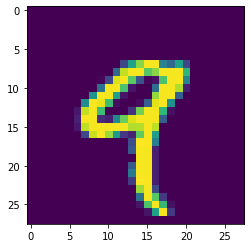

In [14]:
for i in range(5):
    plt.imshow(X_train[i].reshape(28,28))
    plt.show()

## 9. pre process the target variable to make it binary

In [15]:
for i in range(5):
    print(Y_train[i])

5
0
4
1
9


In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## 10. construct a neural network

In [17]:
def buildModel():
    model = Sequential()
    model.add(Flatten(input_shape = (28, 28)))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dropout(.1))
    model.add(Dense(24, activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) #Change for binary classification (entropy)
    return model

In [18]:
model = buildModel()

## 11. plot the network (visualise/summarise)

In [19]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                250       
Total params: 52,050
Trainable params: 52,050
Non-trainable params: 0
_________________________________________________________________
None


## 12. train the network

In [20]:
modelPlots = model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 1s 738us/step - loss: 0.3359 - accuracy: 0.9013
Epoch 2/10
1875/1875 [==============================] - 1s 729us/step - loss: 0.1606 - accuracy: 0.9511
Epoch 3/10
1875/1875 [==============================] - 1s 725us/step - loss: 0.1248 - accuracy: 0.9615
Epoch 4/10
1875/1875 [==============================] - 1s 727us/step - loss: 0.1071 - accuracy: 0.9665
Epoch 5/10
1875/1875 [==============================] - 1s 743us/step - loss: 0.0949 - accuracy: 0.9704
Epoch 6/10
1875/1875 [==============================] - 1s 761us/step - loss: 0.0833 - accuracy: 0.9731
Epoch 7/10
1875/1875 [==============================] - 1s 781us/step - loss: 0.0757 - accuracy: 0.9756
Epoch 8/10
1875/1875 [==============================] - 1s 776us/step - loss: 0.0702 - accuracy: 0.9772
Epoch 9/10
1875/1875 [==============================] - 1s 767us/step - loss: 0.0658 - accuracy: 0.9785
Epoch 10/10
1875/1875 [==============================] - 1s 755u

## 13. plot epoch vs accuracy curve

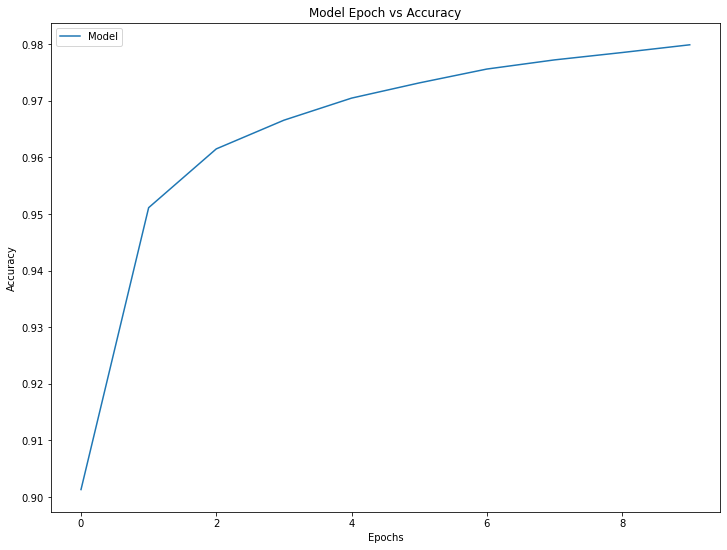

In [21]:
plt.figure(figsize = (12,9))
plt.plot(modelPlots.history['accuracy'])
plt.title('Model Epoch vs Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Model'])
plt.show()

## 14. print the results

In [22]:
Y_pred = model.predict_classes(X_test)
matrix = confusion_matrix(Y_test, Y_pred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [23]:
matrix

array([[ 967,    0,    0,    1,    0,    4,    4,    1,    2,    1],
       [   0, 1118,    3,    2,    0,    0,    2,    1,    9,    0],
       [   6,    0,  995,    5,    2,    0,    3,   11,   10,    0],
       [   1,    0,    2,  983,    0,    8,    0,    5,    6,    5],
       [   0,    0,    5,    0,  963,    0,    5,    2,    0,    7],
       [   1,    0,    0,    8,    0,  872,    2,    2,    6,    1],
       [   3,    3,    3,    2,    1,    7,  935,    1,    3,    0],
       [   1,    0,    6,    3,    1,    0,    0, 1009,    3,    5],
       [   2,    0,    2,    4,    1,    4,    0,    3,  956,    2],
       [   1,    2,    0,   10,    8,    3,    1,    5,    3,  976]],
      dtype=int64)

In [24]:
print("Model Accuracy:\t" + str(modelPlots.history['accuracy'][-1]))
print("Model Loss: \t" + str(modelPlots.history['loss'][-1]))

Model Accuracy:	0.9798666834831238
Model Loss: 	0.059894248843193054
